## Investigate ROC Results

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
import link_prediction_scores as lp
import pickle

RANDOM_SEED = 0

In [64]:
fb_results = None
with open('./results/fb-experiment-3-results.pkl', 'rb') as f:
    fb_results = pickle.load(f)

In [69]:
roc = {}
for experiment_name, method_dict in fb_results.iteritems():
    for method, results in method_dict.iteritems():
        experiment_method = experiment_name + '-' + method
        roc[experiment_method] = results['test_roc']

In [70]:
roc

{'fb-0-0.25-hidden-aa': 0.94809308795322789,
 'fb-0-0.25-hidden-gae': 0.8908721426203946,
 'fb-0-0.25-hidden-jc': 0.80814057737134659,
 'fb-0-0.25-hidden-n2v_dot_prod': 0.81150939192897242,
 'fb-0-0.25-hidden-n2v_edge_emb': 0.91215001005210805,
 'fb-0-0.25-hidden-pa': 0.87182747322607468,
 'fb-0-0.25-hidden-sc': 0.84677870691856716,
 'fb-0-0.5-hidden-aa': 0.89122115317257988,
 'fb-0-0.5-hidden-gae': 0.87930170651998452,
 'fb-0-0.5-hidden-jc': 0.76956612117723378,
 'fb-0-0.5-hidden-n2v_dot_prod': 0.77747853524970378,
 'fb-0-0.5-hidden-n2v_edge_emb': 0.89029982121591444,
 'fb-0-0.5-hidden-pa': 0.8410207444362211,
 'fb-0-0.5-hidden-sc': 0.85001172604308484,
 'fb-0-0.75-hidden-aa': 0.69853800528634769,
 'fb-0-0.75-hidden-gae': 0.8074368251455708,
 'fb-0-0.75-hidden-jc': 0.65428835053723,
 'fb-0-0.75-hidden-n2v_dot_prod': 0.68109375018026885,
 'fb-0-0.75-hidden-n2v_edge_emb': 0.82521796665978286,
 'fb-0-0.75-hidden-pa': 0.81283695851566917,
 'fb-0-0.75-hidden-sc': 0.80727847699654232,
 'fb-

## Generate Bar Plots

In [84]:
# Generate bar plot given graph name (which ego network), frac_hidden, and metric to investigate (e.g. test ROC)
def bar_plot(graph_name, frac_hidden, metric):
    results_dict = fb_results['fb-combined-{}-hidden'.format(HIDDEN)]
    metric_dict = {}
    for method, results_dict in results_dict.iteritems():
        metric_dict[method] = results_dict[metric]
        
    plt.bar(range(len(metric_dict)), metric_dict.values())
    plt.xticks(range(len(metric_dict)), list(metric_dict.keys()))
    plt.show()

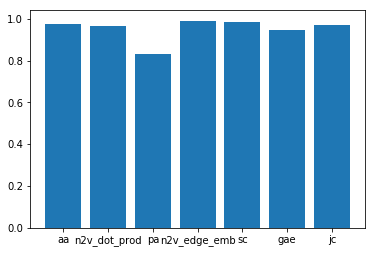

In [87]:
bar_plot('combined', 0.75, 'test_roc')

In [ ]:
def display_network_statistics(graph_name):
    # TODO: read pickle file